<div align="center">
    <h1> <b>PROYECTO DEL DEPARTAMENTO DE MARKETING</b></h1>
    <h1> <b>SEGMENTACIÓN DE CLIENTES</b></h1>
</div>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize # para escalar los datos
from sklearn.cluster import KMeans # para realizar la reducción de dimension
from sklearn.decomposition import PCA # analisis de componmentes principales

In [2]:
# Leer el dataset
df = pd.read_csv("marketing_data.csv")
# A mi me gusta ver todas las columnas, así que realizaré una modificación en la configuración de pandas.
# Esta función recibe dos argumentos: el nombre de la opción y la cantidad de columnas que queremos visualizar. 
pd.set_option('display.max_columns',100) # lo mismo para las filas con max_rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Leyenda
##### CUSTID: Identificación del titular de la tarjeta de crédito
##### BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
##### BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
##### PURCHASES: Cantidad de compras realizadas desde la cuenta
##### ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
##### INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
##### CASH_ADVANCE: Anticipo otorgado al usuario
##### PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
##### PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
##### CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
##### CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
##### PURCHASES_TRX: número de transacciones de compras realizadas
##### CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
##### PAYMENTS: Número de pagos realizados por el usuario
##### MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
##### PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
##### TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

## Primeras descripciones

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

In [6]:
# Vamos a investigar quien ha hecho una compra de $40761!
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# Vamos a investigar quien ha hecho una avance en efectivo de 47137.211 $40761!
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Podemos observar que:
##### 1.- Este cliente hizo un total de 123 transacciones por adelantado!!
##### 2.- tiene un saldo cómodo
##### 3.- siempre mantiene un saldo actualizado
##### 4.- ha realizado solo 432 compras vs las 49039 de la persona anterior
##### 5.- pidió mucho dinero 47137
##### 6.- compra un 58% 
##### 7.- siempre compra con tarjeta vs el anterior que nunca lo hace
##### 8.- paga más que la otra persona por adelantado, sin embargo la ota persona solo a pagado una vez por adelantado

## Leyenda
##### CUSTID: Identificación del titular de la tarjeta de crédito
##### BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
##### BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
##### PURCHASES: Cantidad de compras realizadas desde la cuenta
##### ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
##### INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
##### CASH_ADVANCE: Anticipo otorgado al usuario
##### PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
##### PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
##### CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
##### CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
##### PURCHASES_TRX: número de transacciones de compras realizadas
##### CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
##### PAYMENTS: Número de pagos realizados por el usuario
##### MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
##### PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
##### TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

# TAREA #3: VISUALIZACIÓN DEL DATASET

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3.1 Revisión e imputación de nulos 

### 3.1.1 Hallar nulos

In [9]:
df.isna().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

### 3.1.2 Mapa de calor de nulos

<AxesSubplot: >

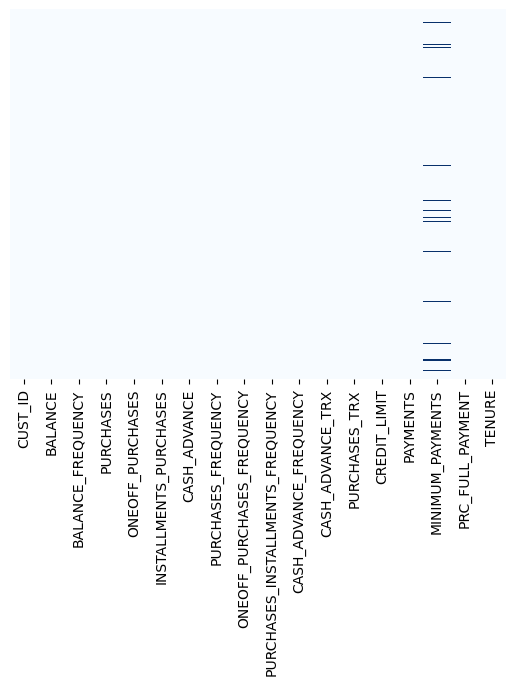

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

### 3.1.3 Imputación de nulos
##### Existen dos formas de hacerlo:
##### 1.- Solo para datos numéricos y se reemplaza directamente el promedio en los datos nulos.
##### 2.- Para datos numéricos o categóricos. Se obtiene el promedio (numérico) o la moda (categórico) y se reemplazan los nulos por ese valor.

In [11]:
# Forma 1
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [12]:
# Forma 2
df['MINIMUM_PAYMENTS'].mean()

864.2065423050761

In [13]:
# Forma 2
df['CREDIT_LIMIT'].mean()

4494.449450364622

In [14]:
# Forma 2
# Reemplazo en datos nulos de MINIMUM_PAYMENTS y CREDIT_LIMIT
#data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].replace(np.nan,864.2065422944161)
#data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].replace(np.nan,4494.449450364581)

In [15]:
# comprobar:
df.isna().sum().sort_values(ascending = False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

## 3.2 Datos duplicados

In [16]:
df.duplicated().sum()

0

## 3.3 Eliminar datos inservibles

In [17]:
# Podemos deshacernos del campo Customer ID porque no posee valor estadístico
df.drop(['CUST_ID'], axis=1, inplace = True)

In [18]:
# Revisar
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3.4 Transformar columnas de Yes/No en 1 y 0

In [19]:
# No existen este tipo de columnas :)

## 3.5 Observación de las columnas (variables, atributos, etc)

In [20]:
# Cantidad de columnas
cantidad_columnas = len(df.columns)
cantidad_columnas

17

In [21]:
# Nombre de cada columna
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## 3.6 Graficos de frecuencia

### 3.6.1 Gráfico KERNEL DENSITY ESTIMATE o gráfico de densidad de probabilidad de variable continua

C:\Users\Danko\AppData\Local\Temp\ipykernel_19240\2968778622.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label': 'KDE'}, hist_kws = {'color':'b'})
C:\Users\Danko\AppData\Local\Temp\ipykernel_19240\2968778622.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

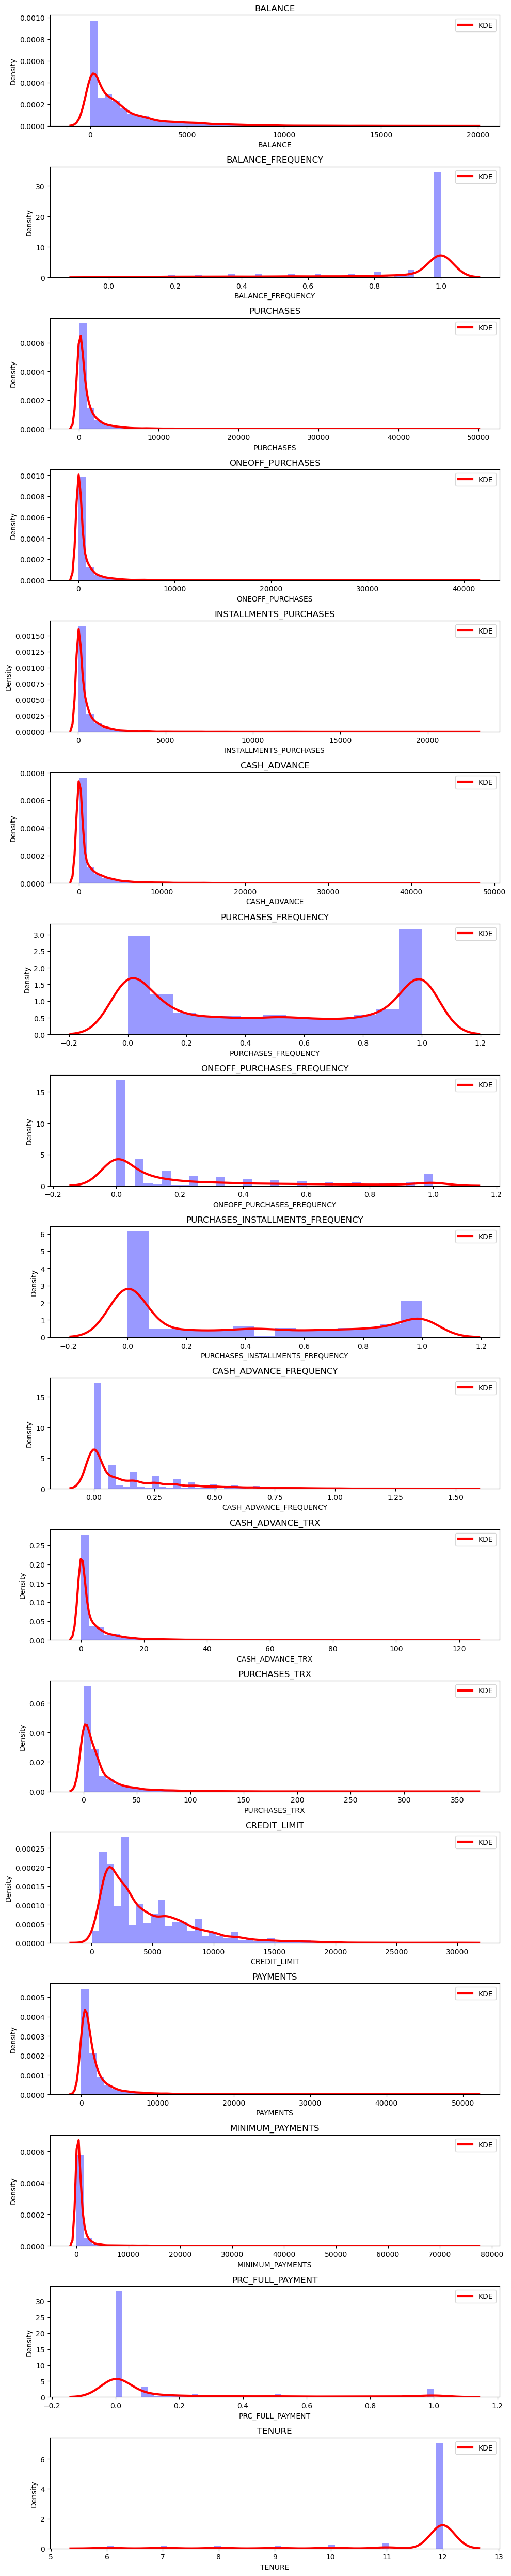

In [22]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

plt.figure(figsize=(10,50))
for i in range(cantidad_columnas):
    plt.subplot(cantidad_columnas,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label': 'KDE'}, hist_kws = {'color':'b'})
    plt.title(df.columns[i])

    plt.tight_layout()
    plt.legend()

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio


### 3.6.2 Mapa Global

array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

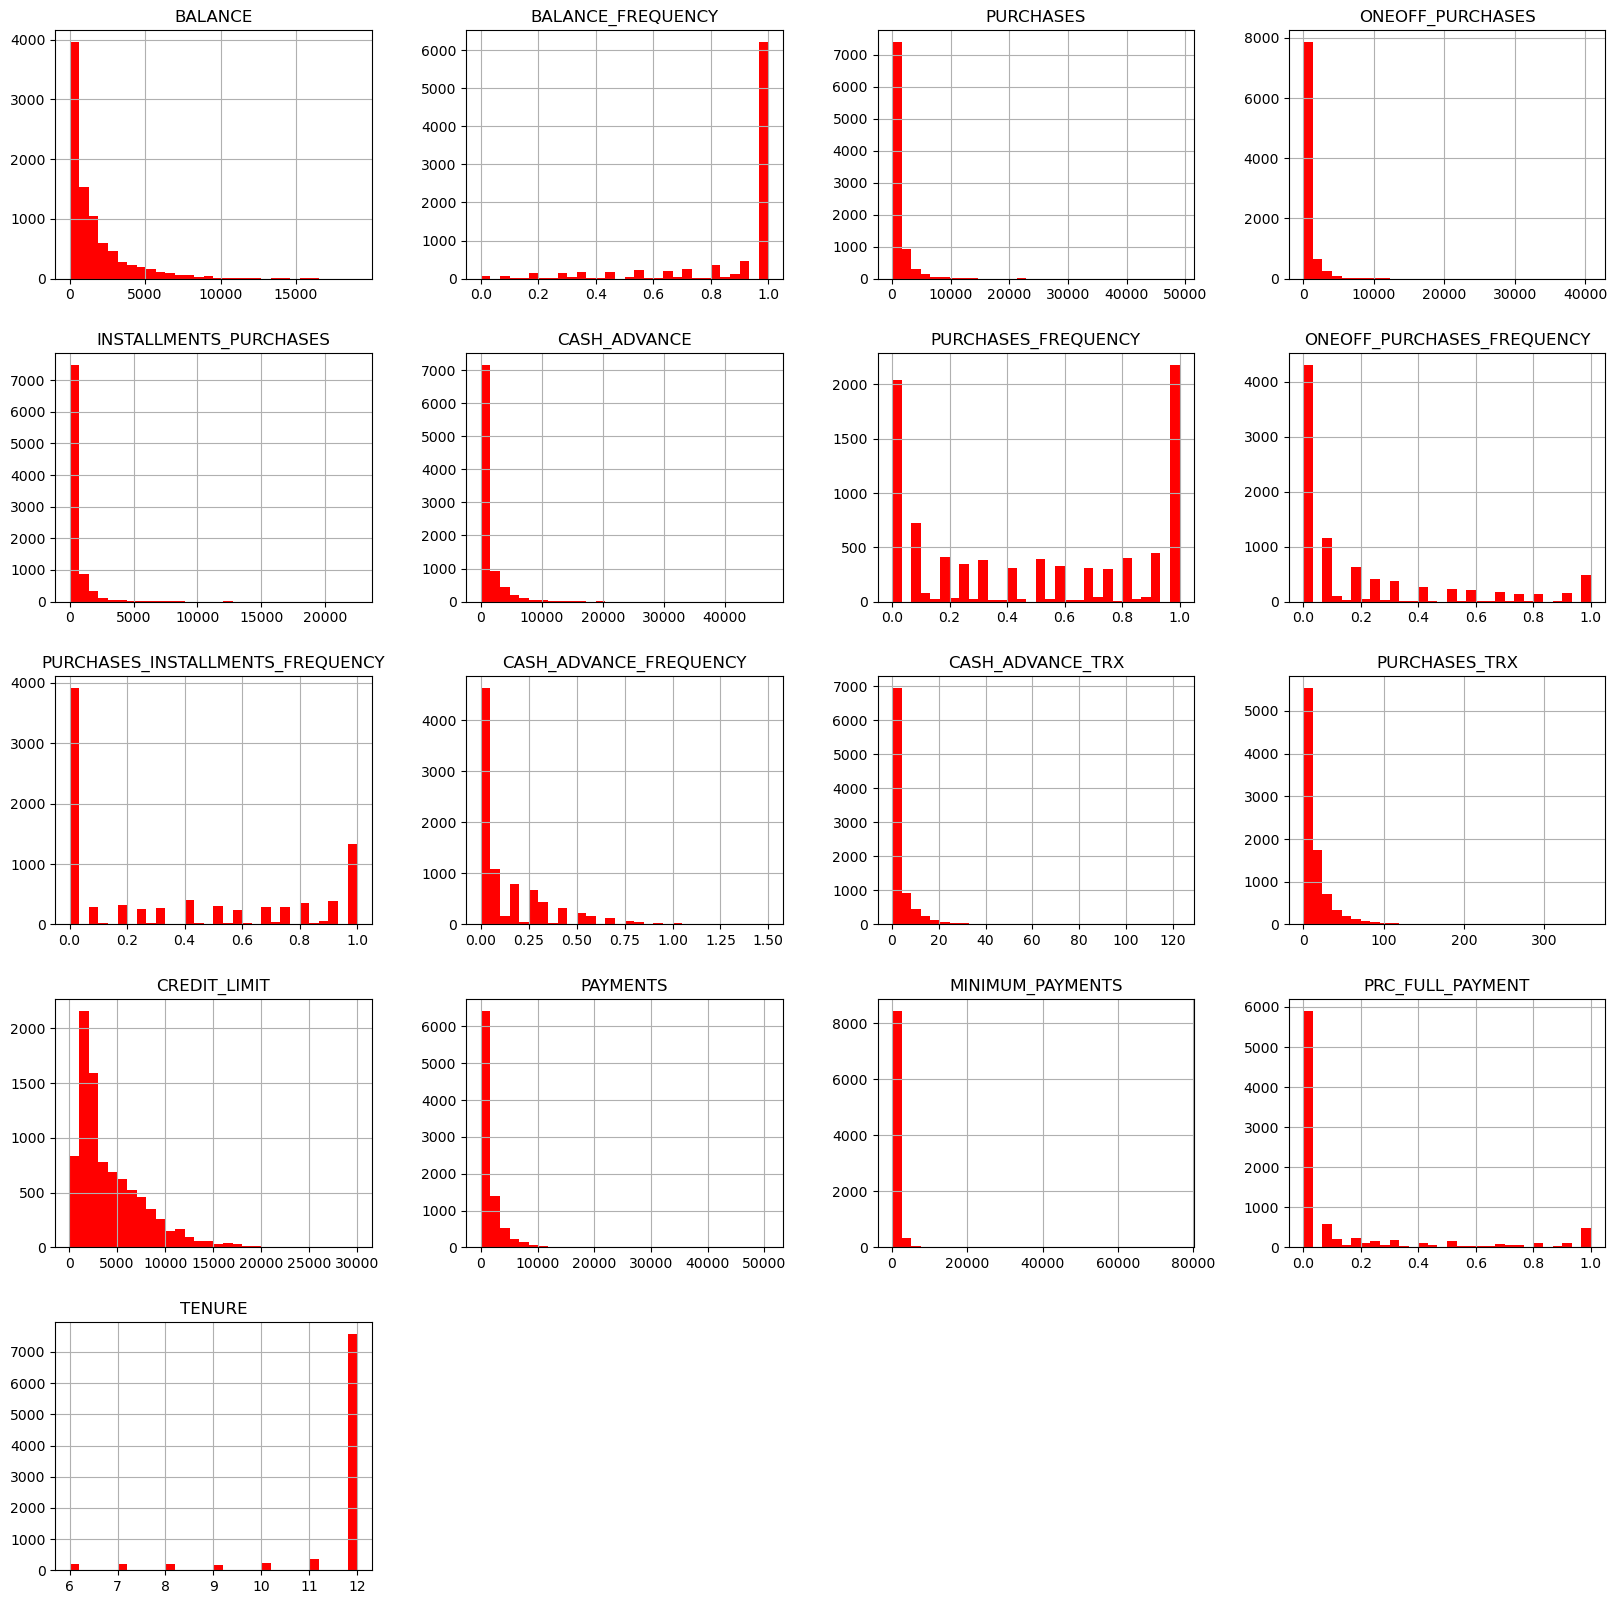

In [23]:
# Ahora que tenemos la seguridad de que no hay datos nulos, realizaremos un mapa global de nuestros datos.
df.hist(bins = 30, figsize = (20, 20), color ='r')

## 3.7 Correlaciones

### 3.7.1 Matriz de Correlación

<AxesSubplot: >

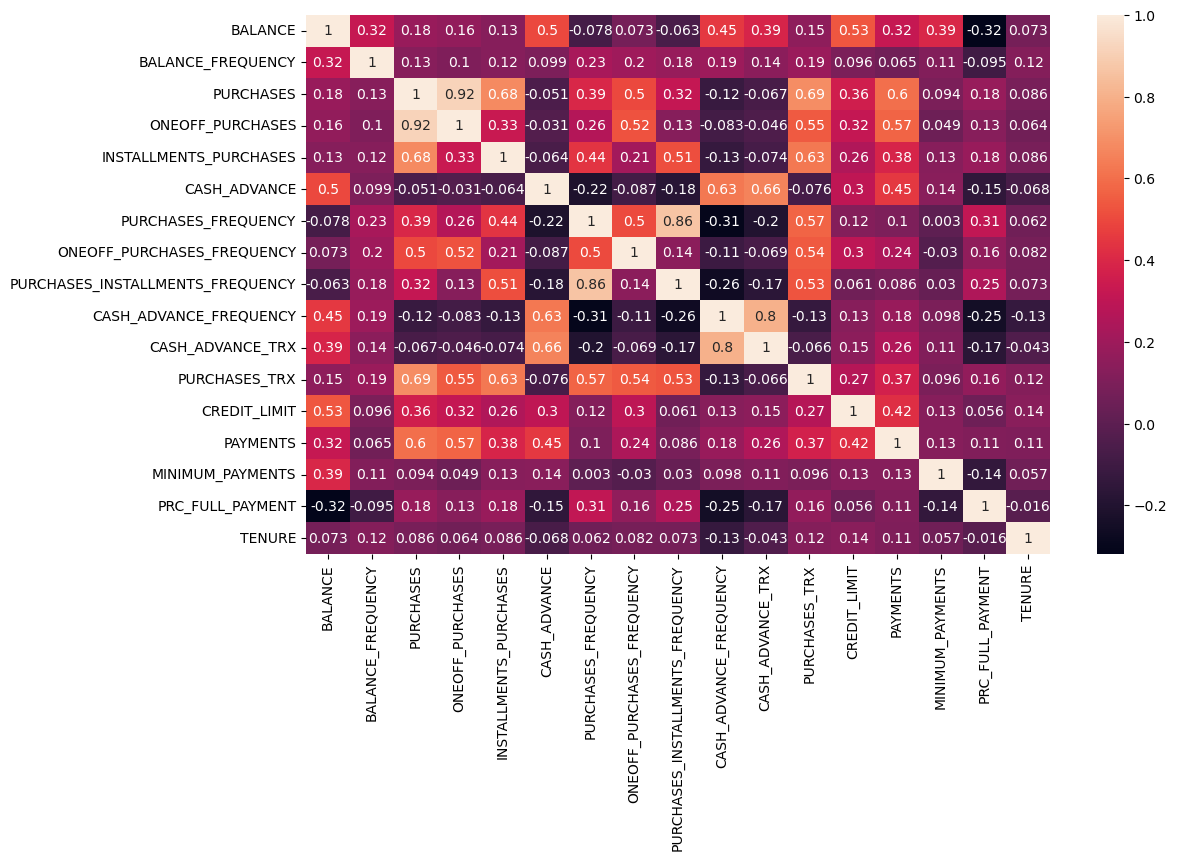

In [24]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (12,7)) # grafico en forma de mapa de calor
sns.heatmap(correlations, annot = True) # Pintar las correlations

### 3.7.2 Observaciones en la Matriz

##### 1.- ONEOFF_PURCHASES está altamente correlacionado PURCHASES
##### 2.- PURCHASES_INSTALLMENTS_FREQUENCY está altamente correlacionado con PURCHASES_FREQUENCY
##### 3.- CASH_ADVANCE_TRX está altamente correlacionado con CASH_ADVANCE_FREQUENCY

### 3.7.3 Correlaciones graficadas

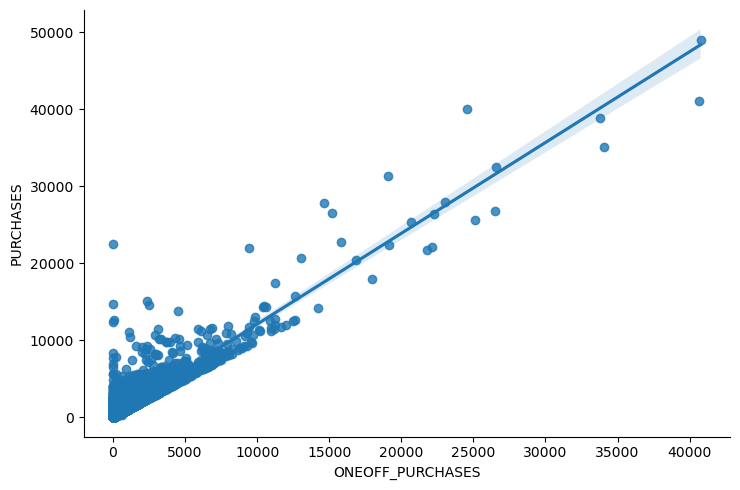

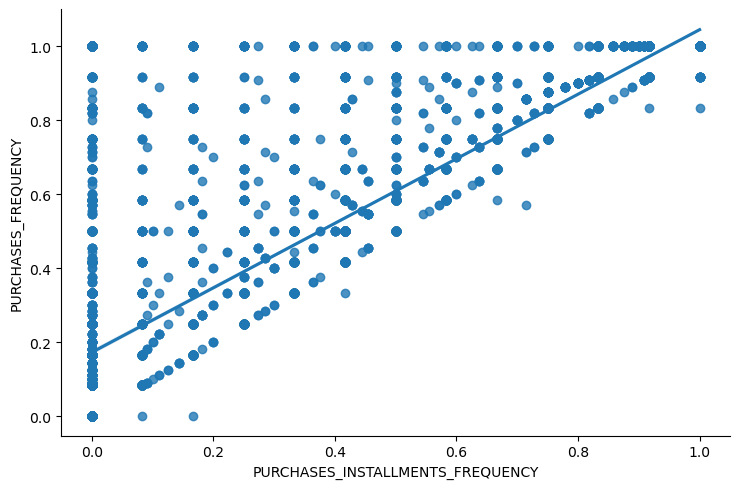

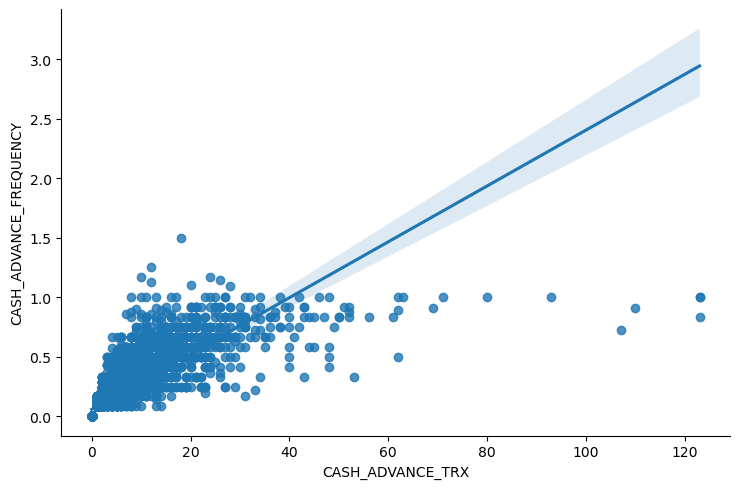

In [25]:
sns.lmplot(x ='ONEOFF_PURCHASES', y ='PURCHASES', data = df, aspect = 1.5,palette = 'rainbow')
sns.lmplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', y='PURCHASES_FREQUENCY', data = df, aspect = 1.5,palette = 'rainbow')
sns.lmplot(x='CASH_ADVANCE_TRX', y='CASH_ADVANCE_FREQUENCY', data = df, aspect = 1.5,palette = 'rainbow')

# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO DE JAMBU

## 5.1 Escalar el dataset


In [26]:
# Los números de cada variable son muy distintos entre si, por lo tanto:
scaler = StandardScaler() # escalar variables
df_scaled = scaler.fit_transform(df)

In [27]:
df_scaled.shape

(8950, 17)

In [28]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## 5.2 Graficar el codo de jambú

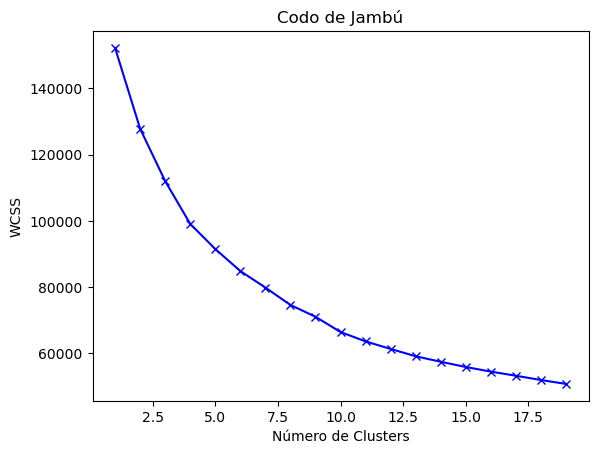

In [29]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_scaled) # Aquí anota que aplica K-means a la base de datos
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss, 'bx-')
plt.title('Codo de Jambú')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

## 5.3 Observaciones y Conclusión.
#### Con el gráfico podemos ver que en x = 4 es donde se forma el codo de la curva.
#### Sin embargo, los valores no se reducen a una forma lineal hasta x = 8. 
#### Por lo tanto usaremos 7 u 8 clusters.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

## 6.1 Crear el modelo de entrenamiento

In [30]:
kmeans = KMeans(8) # creación modelo
kmeans.fit(df_scaled) # entrenamiento del modelo
labels = kmeans.labels_ # guardamos las etiquetas que creó el modelo en labels

## 6.2 Ver los Clusters

In [31]:
# Ver los labels
labels

array([0, 3, 2, ..., 6, 6, 6])

In [32]:
# Ver cantidad de etiquetas creadas
labels.shape

(8950,)

In [33]:
# Etiqueta menor
labels.min()

0

In [34]:
# Etiqueta mayor
labels.max()

7

In [35]:
# Ver los 8 baricentros de cada cluster
kmeans.cluster_centers_.shape # muestra en este caso las 8 observaciones x 17 valores

(8, 17)

In [36]:
# Ver los centros de cada cluster
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])      
cluster_centers # cada fila del siguiente set sería un centroide del clustering

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.011240,0.405020,-0.354335,-0.238911,-0.398790,-0.098672,-0.842068,-0.383299,-0.751677,0.095259,-0.034770,-0.477911,-0.304686,-0.251732,-0.008165,-0.455202,0.273038
1,-0.701092,-2.138460,-0.309767,-0.234182,-0.302091,-0.322644,-0.553598,-0.440043,-0.439844,-0.521764,-0.376480,-0.418560,-0.176244,-0.202002,-0.257020,0.283165,0.201504
2,-0.119739,0.402597,0.579070,0.703405,0.076726,-0.331689,0.998415,1.915624,0.210785,-0.417275,-0.332793,0.662641,0.468390,0.172940,-0.156466,0.463739,0.274920
3,1.669404,0.390095,-0.221249,-0.157449,-0.233946,2.006144,-0.482682,-0.212973,-0.422983,1.918998,1.925983,-0.271367,1.015509,0.816635,0.507443,-0.390751,0.071837
4,-0.363098,0.330724,-0.033578,-0.241245,0.363624,-0.363116,0.994208,-0.381074,1.205011,-0.472941,-0.360165,0.191896,-0.260912,-0.214852,-0.050827,0.313986,0.255309
5,1.103934,0.476356,2.540214,1.799939,2.699566,-0.148019,1.170029,1.534831,1.296170,-0.271592,-0.134888,3.189705,1.314906,1.464834,0.800689,0.233791,0.335922
6,-0.337200,-0.351274,-0.287007,-0.212744,-0.287412,0.067931,-0.202320,-0.283605,-0.226363,0.305828,-0.000825,-0.387485,-0.562891,-0.391704,-0.209098,0.013610,-3.199775
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


### Observación: No es fácil entender estos valores (YA QUE SON VALORES ESCALADOS), por lo que conviene realizar la transformación inversa. ES DECIR, transformarlos nuevamente a su formato original.

## 6.3 Transformación Escalar Inverso

In [37]:
cluster_centers =scaler.inverse_transform(cluster_centers) # transformación escalar inversa
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns]) #transformar a dataframe 
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1587.869436,0.973216,246.161891,195.893630,50.446853,771.950425,0.152388,0.088112,0.065702,0.154206,3.011548,2.830747,3385.877541,1004.403081,845.178372,0.020576,11.882714
1,105.211929,0.370689,341.382646,203.742891,137.890642,302.271277,0.268165,0.071184,0.189632,0.030734,0.679628,4.306002,3853.203250,1148.368309,265.232576,0.236535,11.786982
2,1315.248998,0.972642,2240.396005,1759.945881,480.450125,283.303187,0.891063,0.773926,0.448209,0.051643,0.977758,31.180605,6198.645260,2233.788740,499.569861,0.289350,11.885231
3,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
4,808.717603,0.955616,931.465298,192.020293,739.888540,217.399758,0.889374,0.088776,0.843340,0.040504,0.790963,19.479643,3545.144092,1111.168198,745.757361,0.245550,11.858987
5,3862.220526,0.990115,6430.411958,3579.967229,2852.251958,668.468094,0.959940,0.660328,0.879568,0.080796,2.328313,93.993976,9278.614458,5973.693373,2730.179290,0.222095,11.966867
6,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


## 6.4 Predicción o Segmentación de un cliente recién llegado

##### 1.- Ahora podemos otorgar, no solo a las 8950 personas del dataframe, si no que si tenemos otro dataset con nuevas observaciones y las escalamos usando el mismo scaler, nos podemos quedar con la nueva etiqueta que le asiganríamos a esos nuevos clientes. Esto es verdaderamente muy sencillo, porque gracias a esto, ahora somos capaces de llevar a cabo la transformacion.
##### 2.- En particular, como nuestros clientes ya los tenemos en el dataframe original, este es el momento perfecto para combinarlo todo y añadir la columna cluster al final, usando las labels que devuelve el algoritmo originalmente o usando el y_kmeans si queremos hacer una preddiccion final.
##### En conclusión, las labels son las mismas etiquetas que se han ido asignando a cada una de las observaciones del dataframe como parte del proceso iterativo de kmeans y las y_kmeans es lo contrario, es decir, una vez que ya tenemos el cluster definido, si yo pusiera la observacion en ese espacio de 17 dimensiones, cual sería de los 8 centros el que le quedaría mas cerca.

In [38]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([6, 1, 4, ..., 0, 6, 2])

## 6.5 Concatenar las etiquetas de clusters a la tabla original

In [39]:
# Concatenamos las etiquetas de los clusters con el dataset original
df_cluster = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
df_cluster


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


## 6.6 Observaciones

In [40]:
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1587.869436,0.973216,246.161891,195.893630,50.446853,771.950425,0.152388,0.088112,0.065702,0.154206,3.011548,2.830747,3385.877541,1004.403081,845.178372,0.020576,11.882714
1,105.211929,0.370689,341.382646,203.742891,137.890642,302.271277,0.268165,0.071184,0.189632,0.030734,0.679628,4.306002,3853.203250,1148.368309,265.232576,0.236535,11.786982
2,1315.248998,0.972642,2240.396005,1759.945881,480.450125,283.303187,0.891063,0.773926,0.448209,0.051643,0.977758,31.180605,6198.645260,2233.788740,499.569861,0.289350,11.885231
3,5039.198156,0.969681,530.502543,331.104880,199.513592,5185.849543,0.296627,0.138924,0.196333,0.519155,16.392246,7.964652,8189.286825,4097.222532,2046.782053,0.039427,11.613455
4,808.717603,0.955616,931.465298,192.020293,739.888540,217.399758,0.889374,0.088776,0.843340,0.040504,0.790963,19.479643,3545.144092,1111.168198,745.757361,0.245550,11.858987
5,3862.220526,0.990115,6430.411958,3579.967229,2852.251958,668.468094,0.959940,0.660328,0.879568,0.080796,2.328313,93.993976,9278.614458,5973.693373,2730.179290,0.222095,11.966867
6,862.621956,0.794057,390.010464,239.326032,151.164432,1121.325562,0.409150,0.117853,0.274475,0.196343,3.243200,5.078400,2446.423119,599.199915,376.911693,0.157695,7.235200
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [41]:
## Leyenda
##### CUSTID: Identificación del titular de la tarjeta de crédito
##### BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
##### BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
##### PURCHASES: Cantidad de compras realizadas desde la cuenta
##### ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
##### INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
##### CASH_ADVANCE: Anticipo otorgado al usuario
##### PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
##### PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
##### CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
##### CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
##### PURCHASES_TRX: número de transacciones de compras realizadas
##### CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
##### PAYMENTS: Número de pagos realizados por el usuario
##### MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
##### PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
##### TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

#### Primer Cluster de Clientes (TRANSACTORS): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero (realizan compras ocasionalmente), Clúster con el saldo más bajo (104) y anticipo en efectivo (303), Porcentaje de pago completo = 23%
#### Segundo Cluster de Clientes (REVOLVERS) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto (5000) y anticipo en efectivo (5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
#### Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto (16K) y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
#### Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo.

## 6.7 Visualización de histogramas para cada cluster 


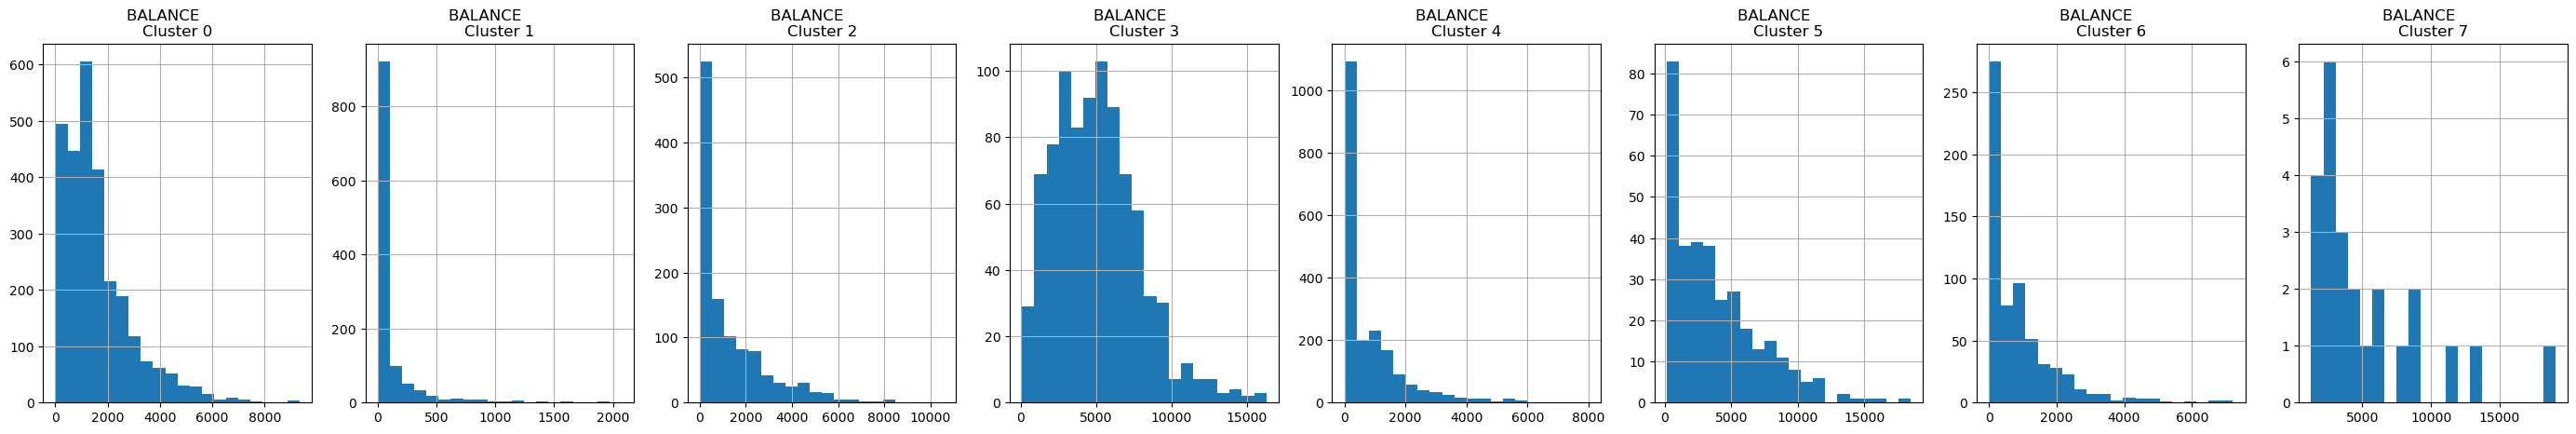

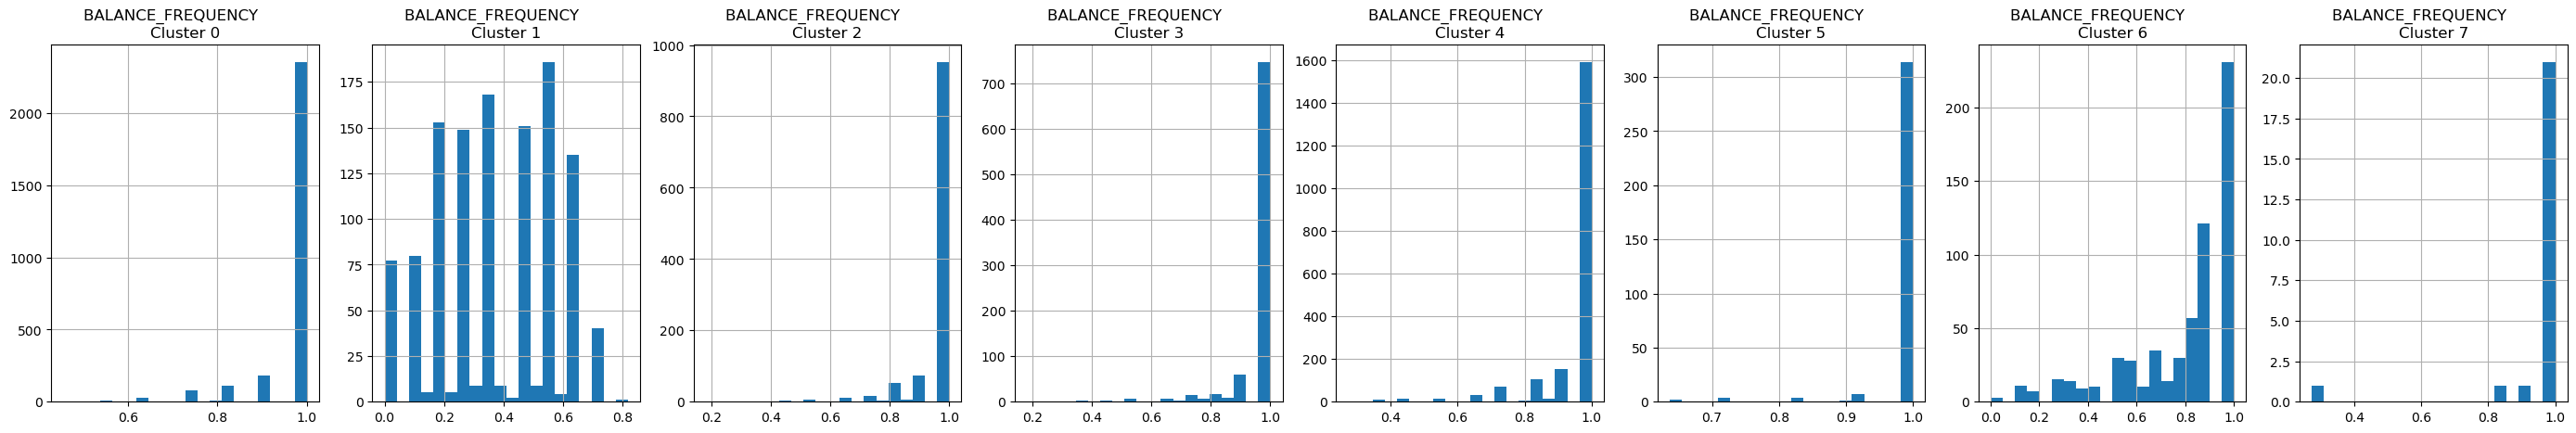

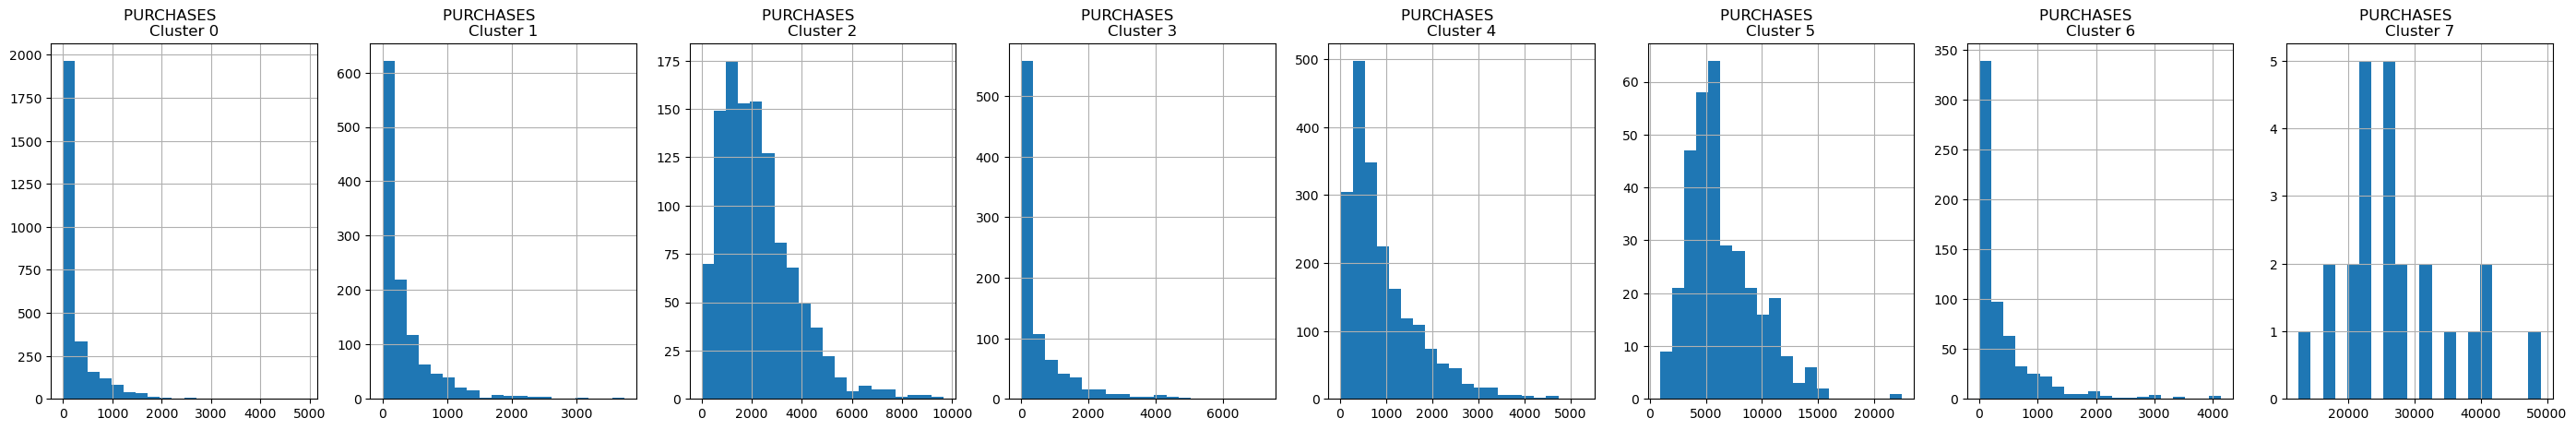

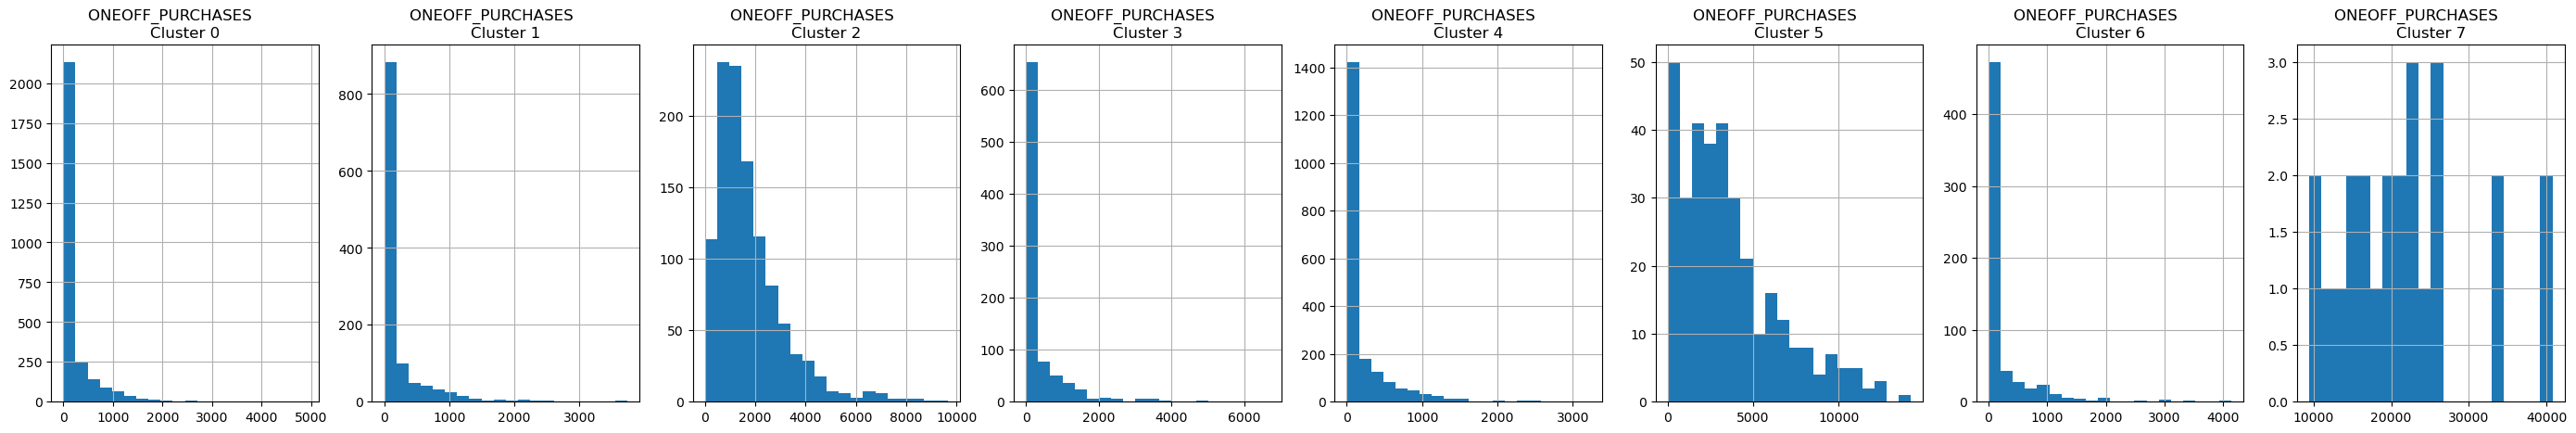

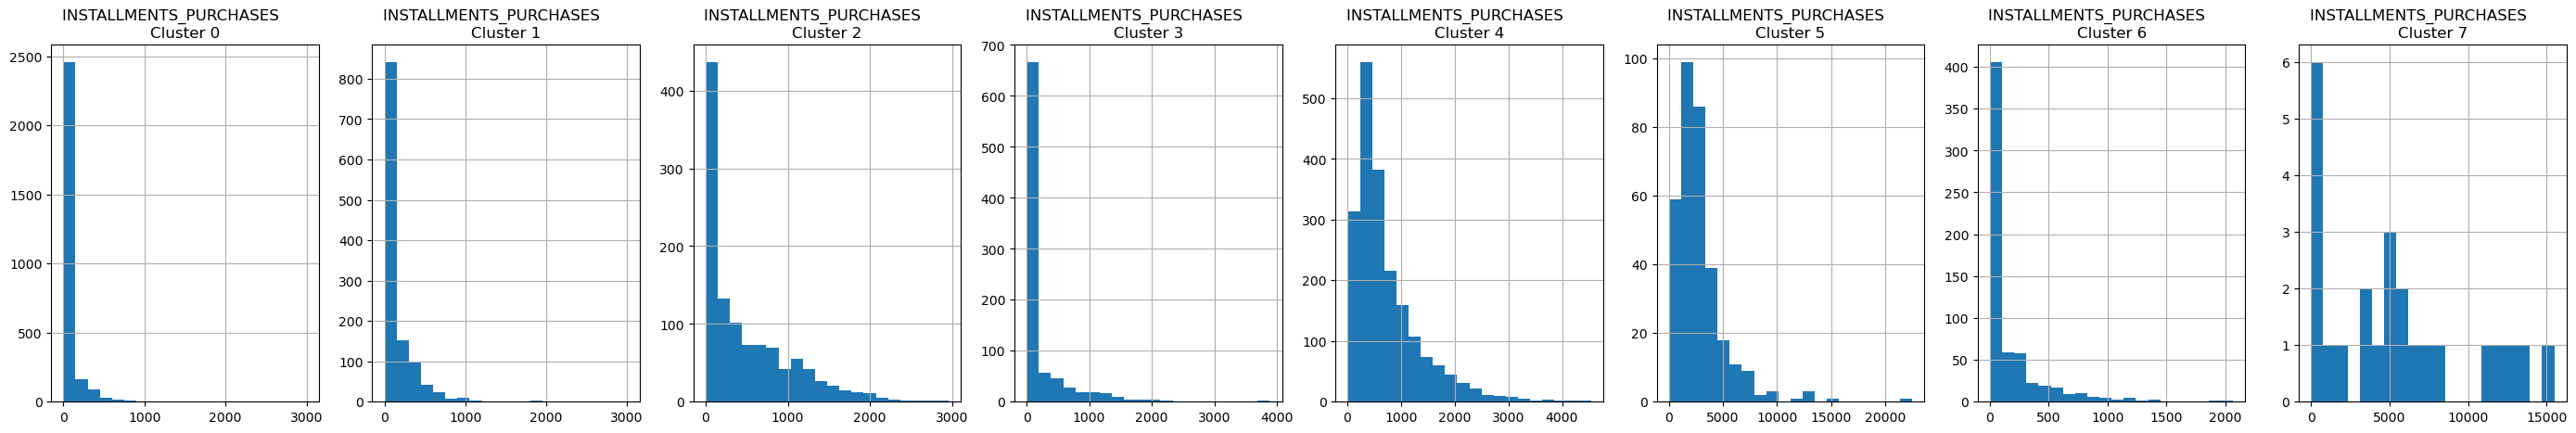

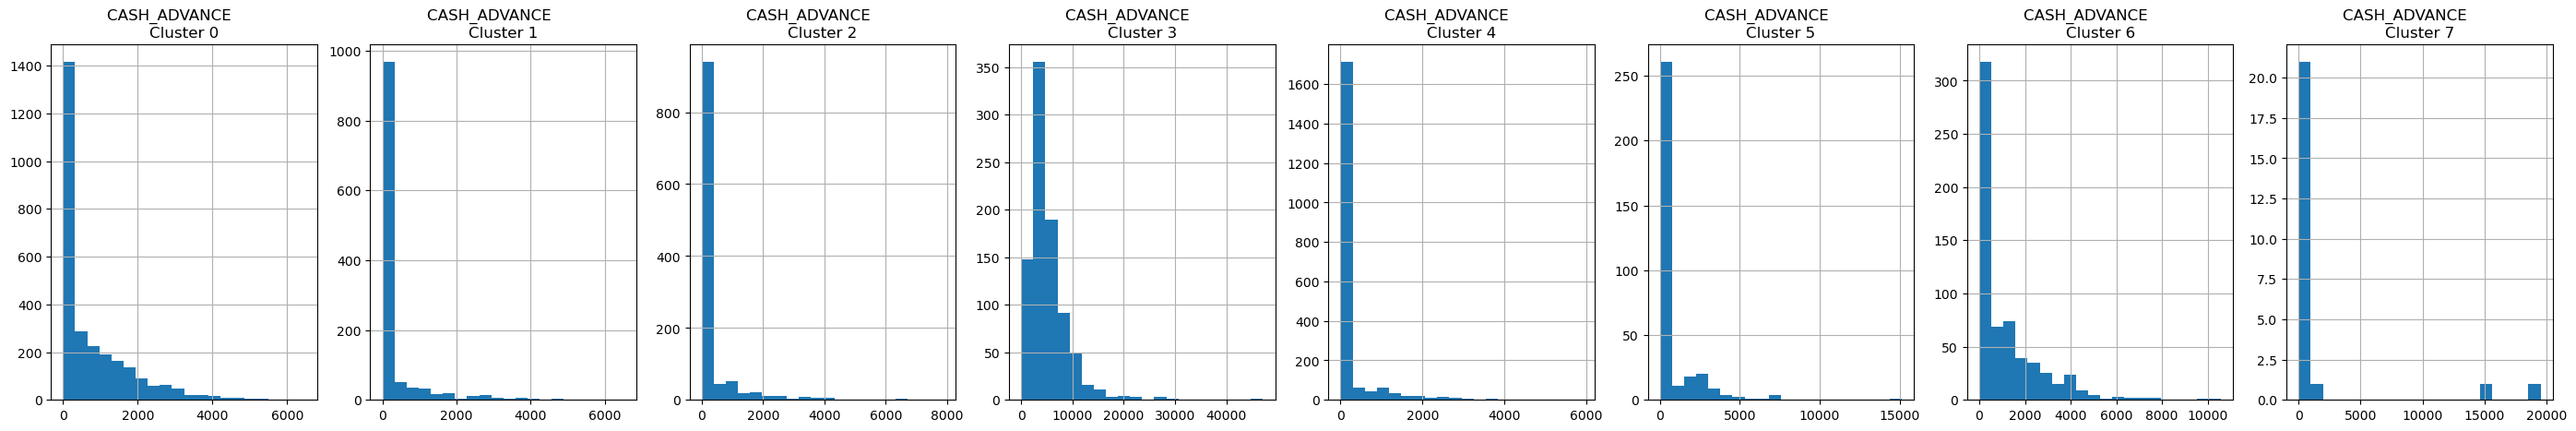

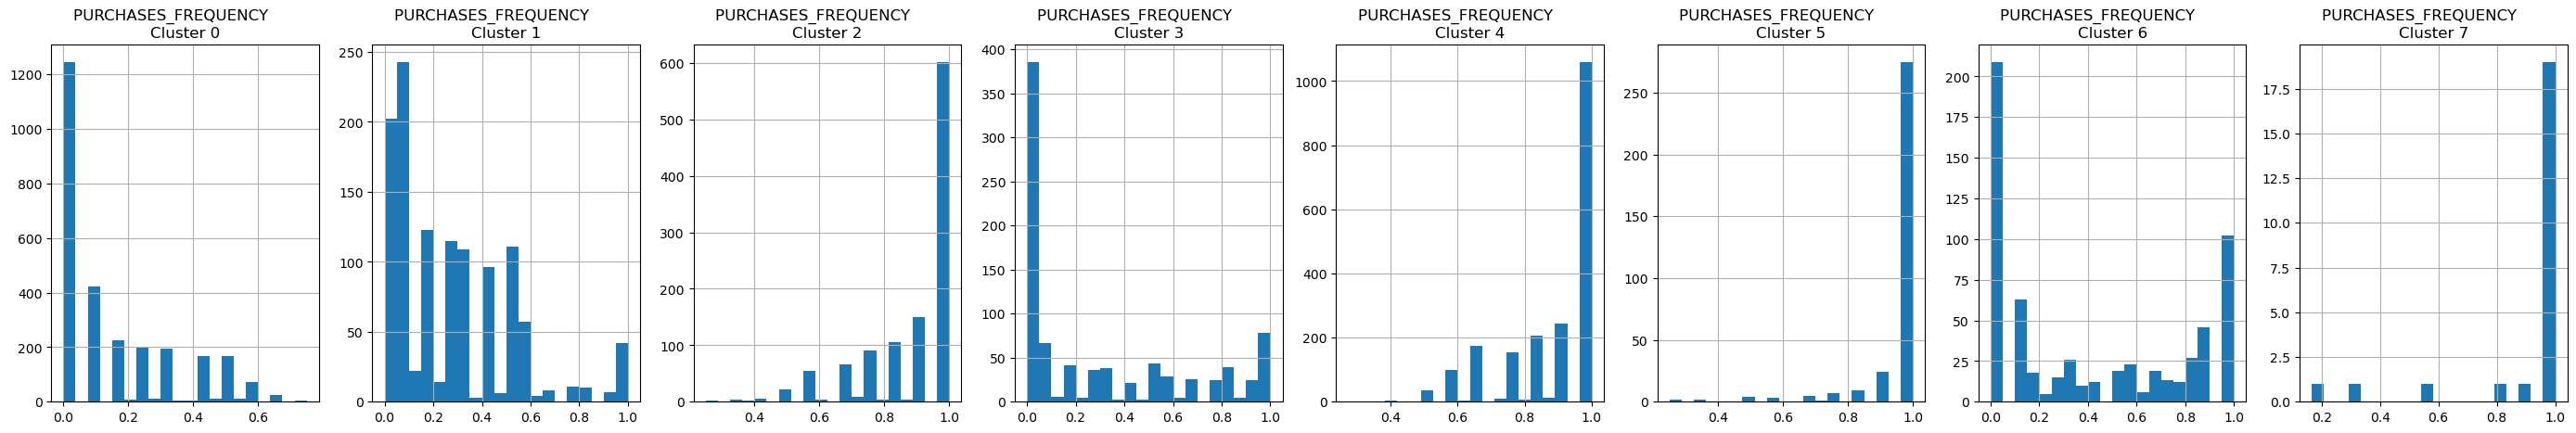

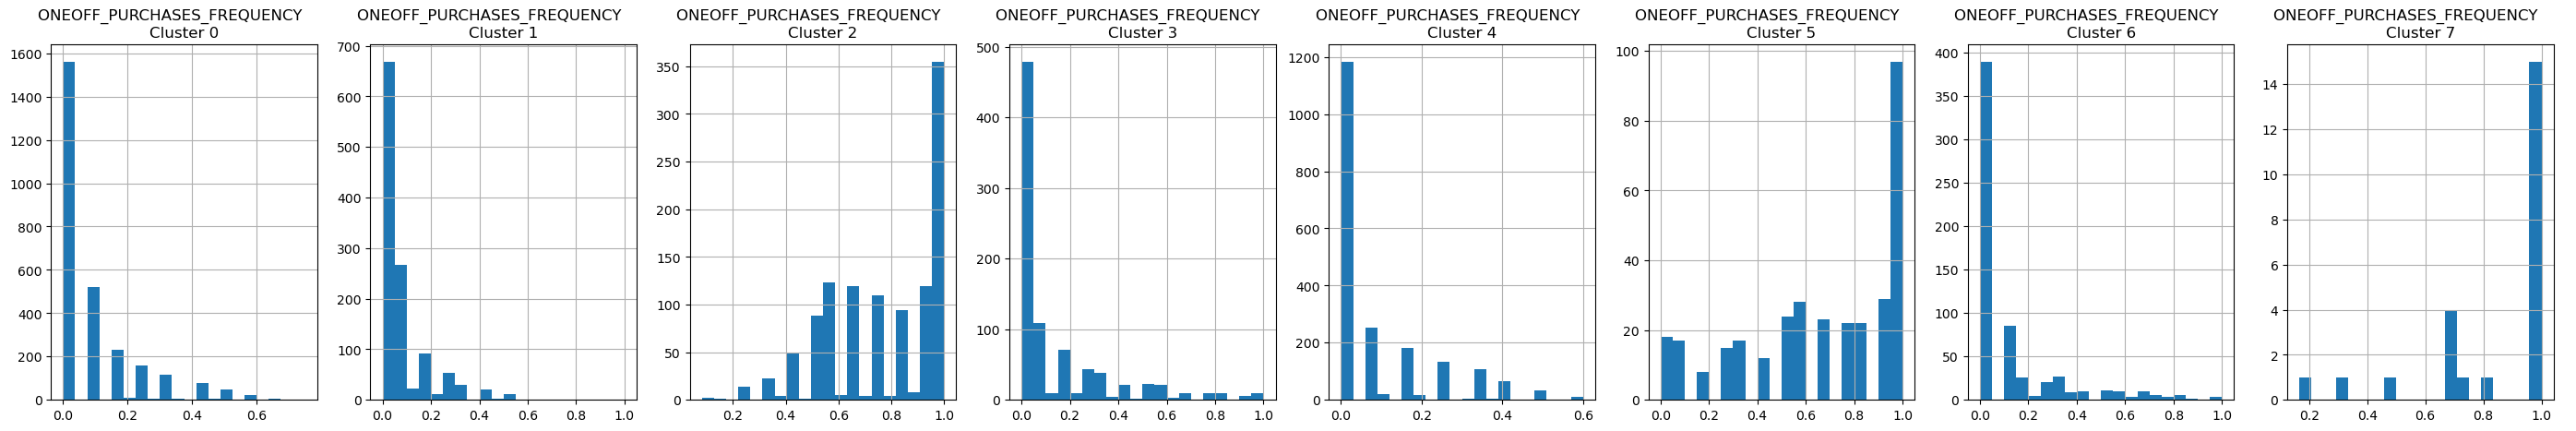

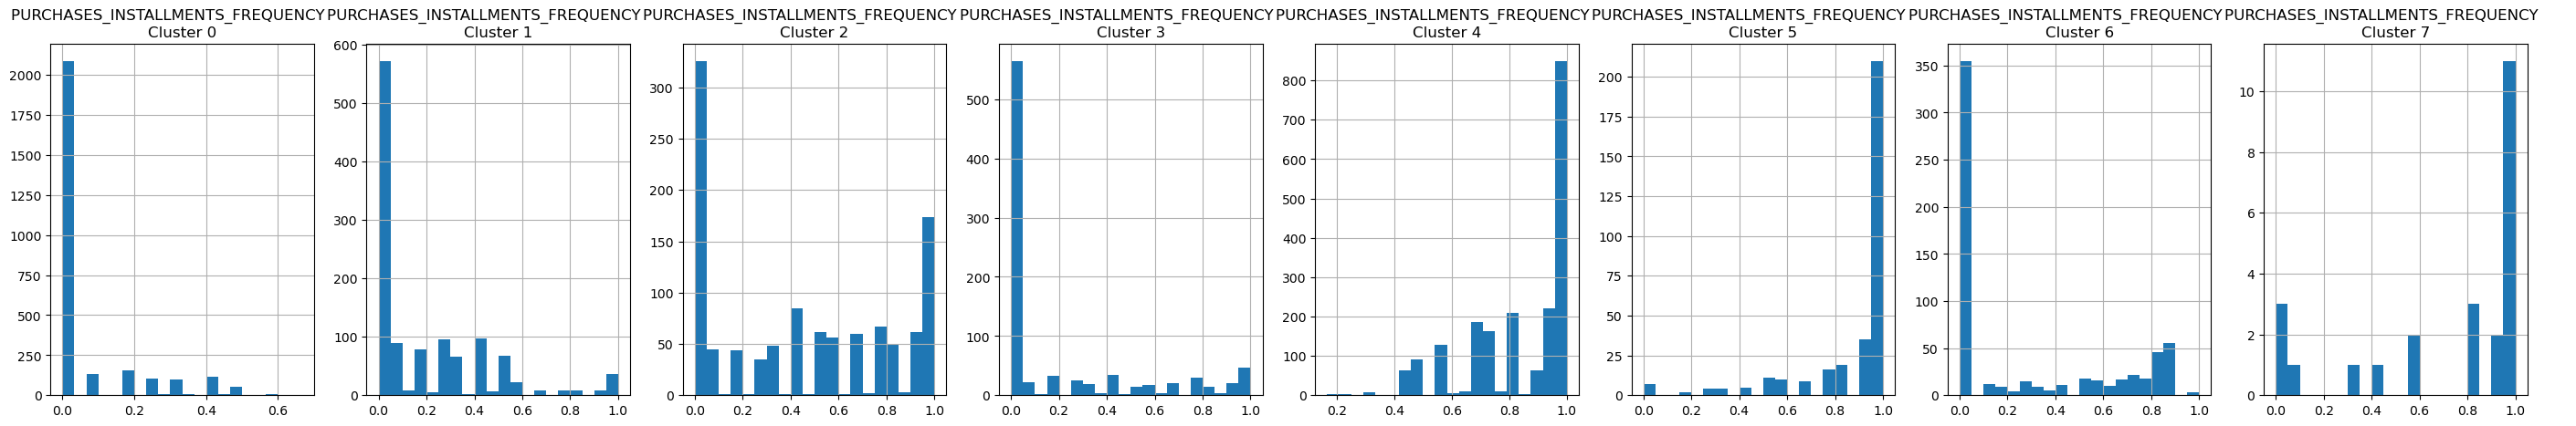

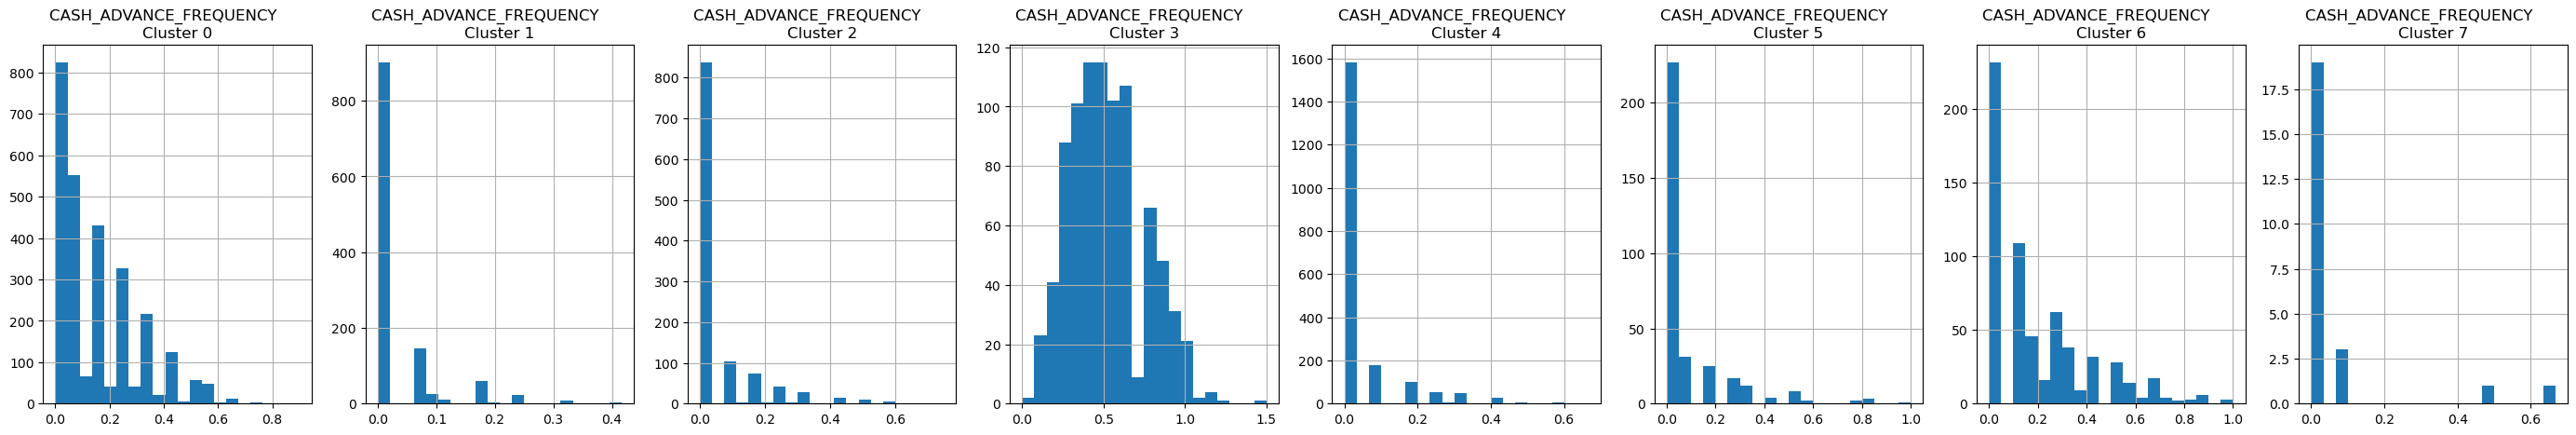

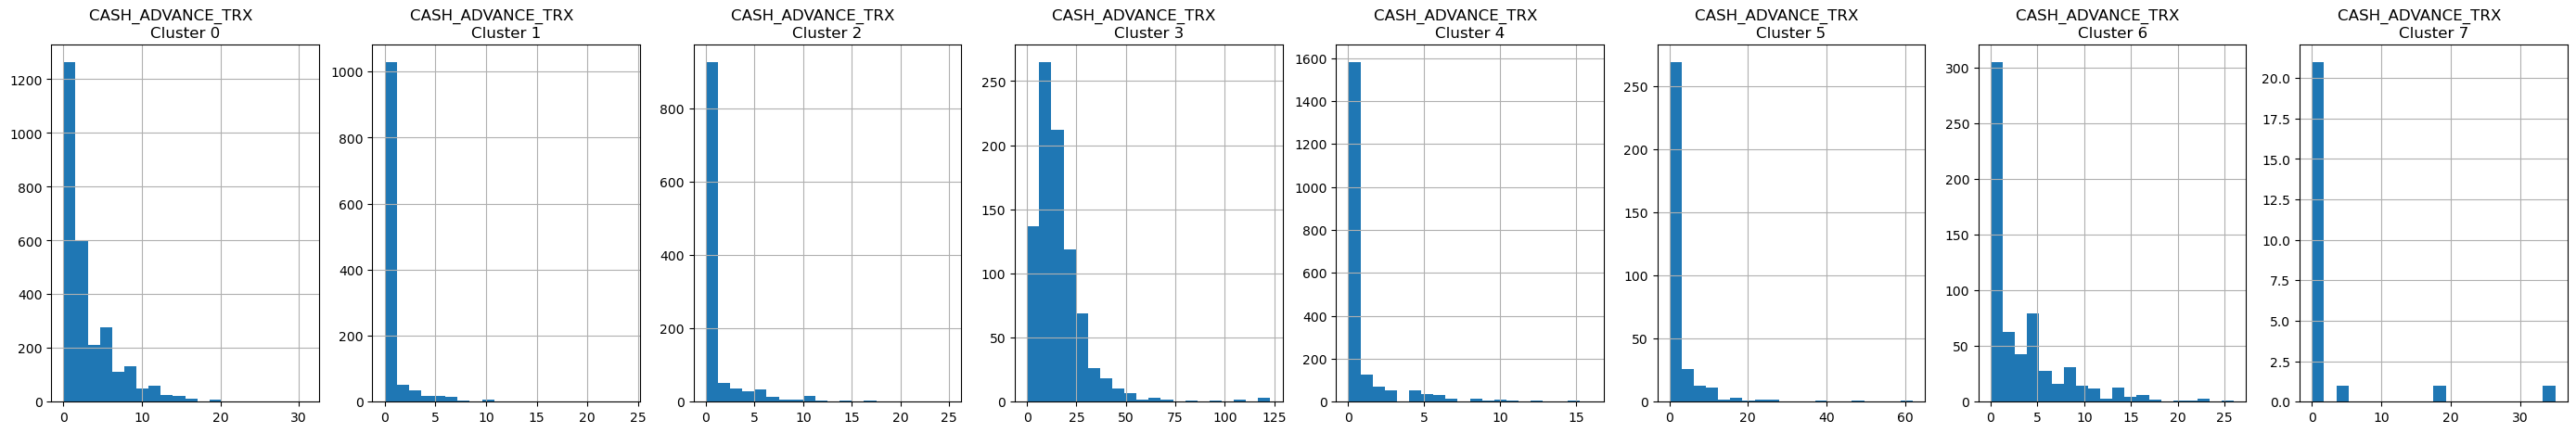

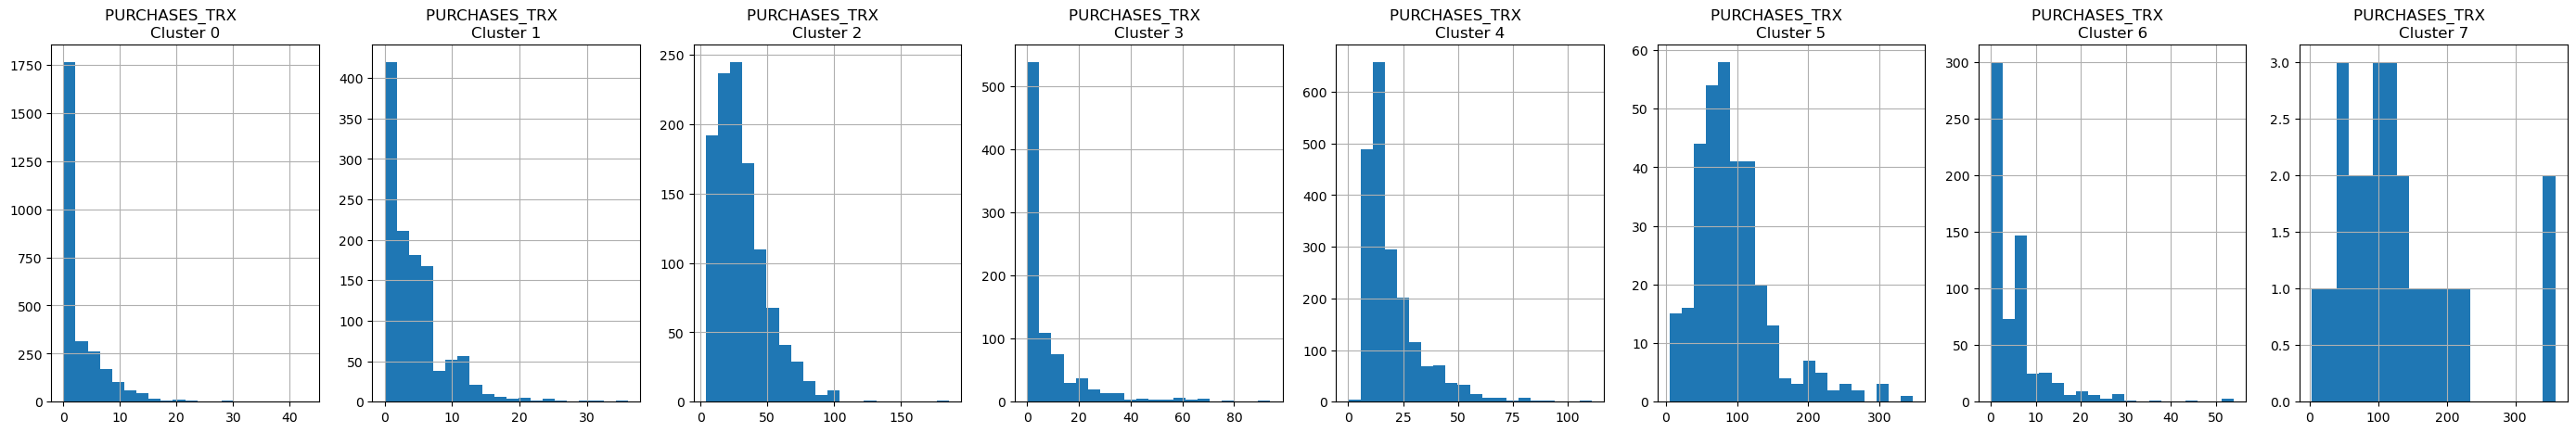

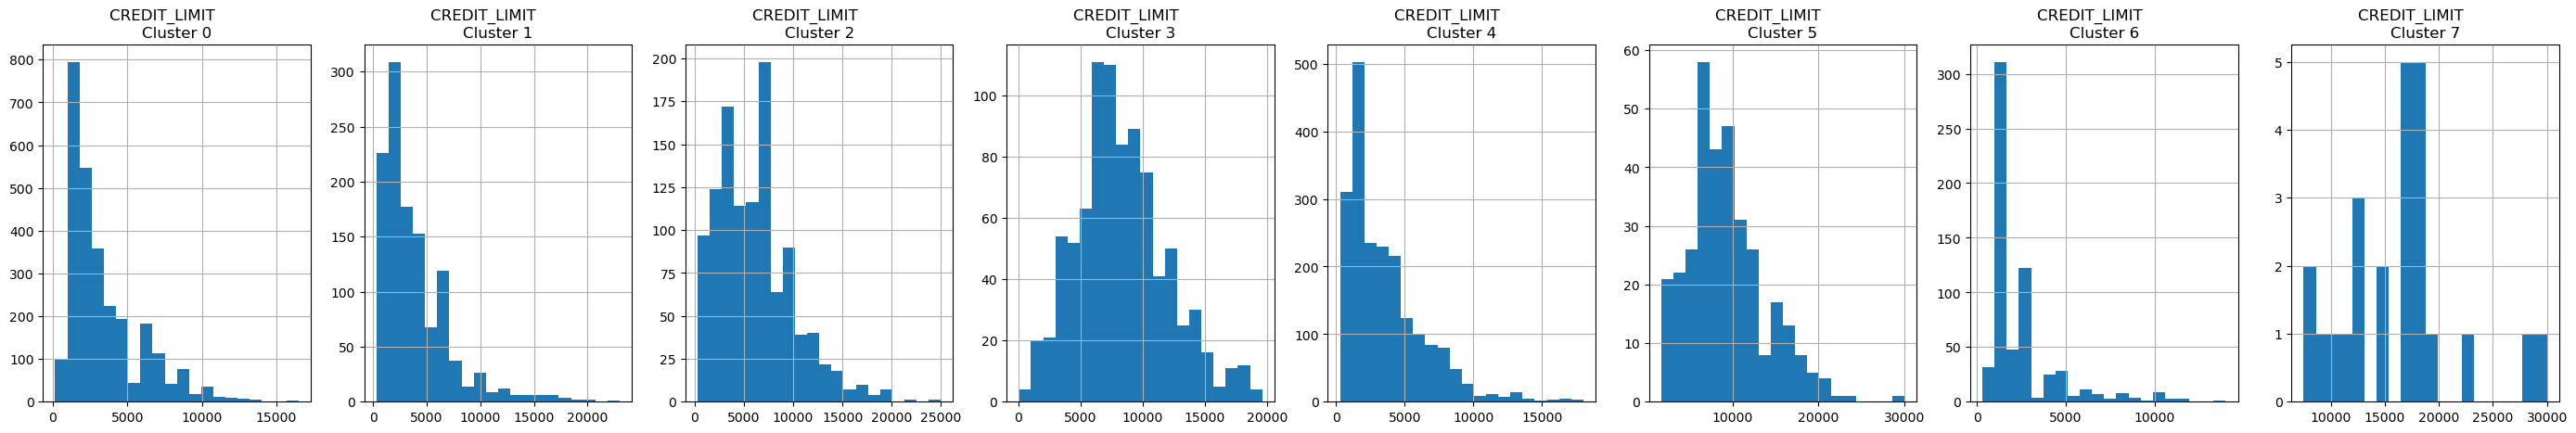

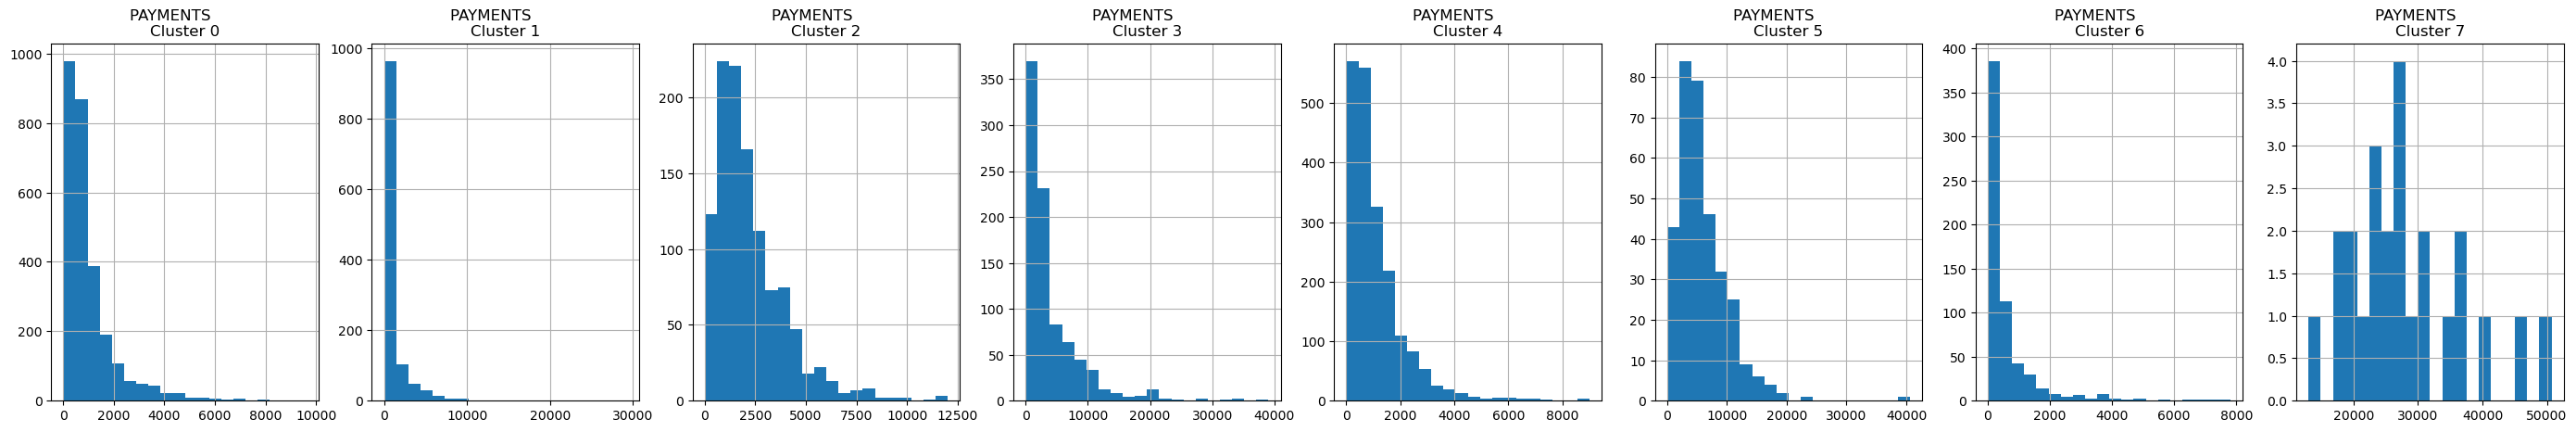

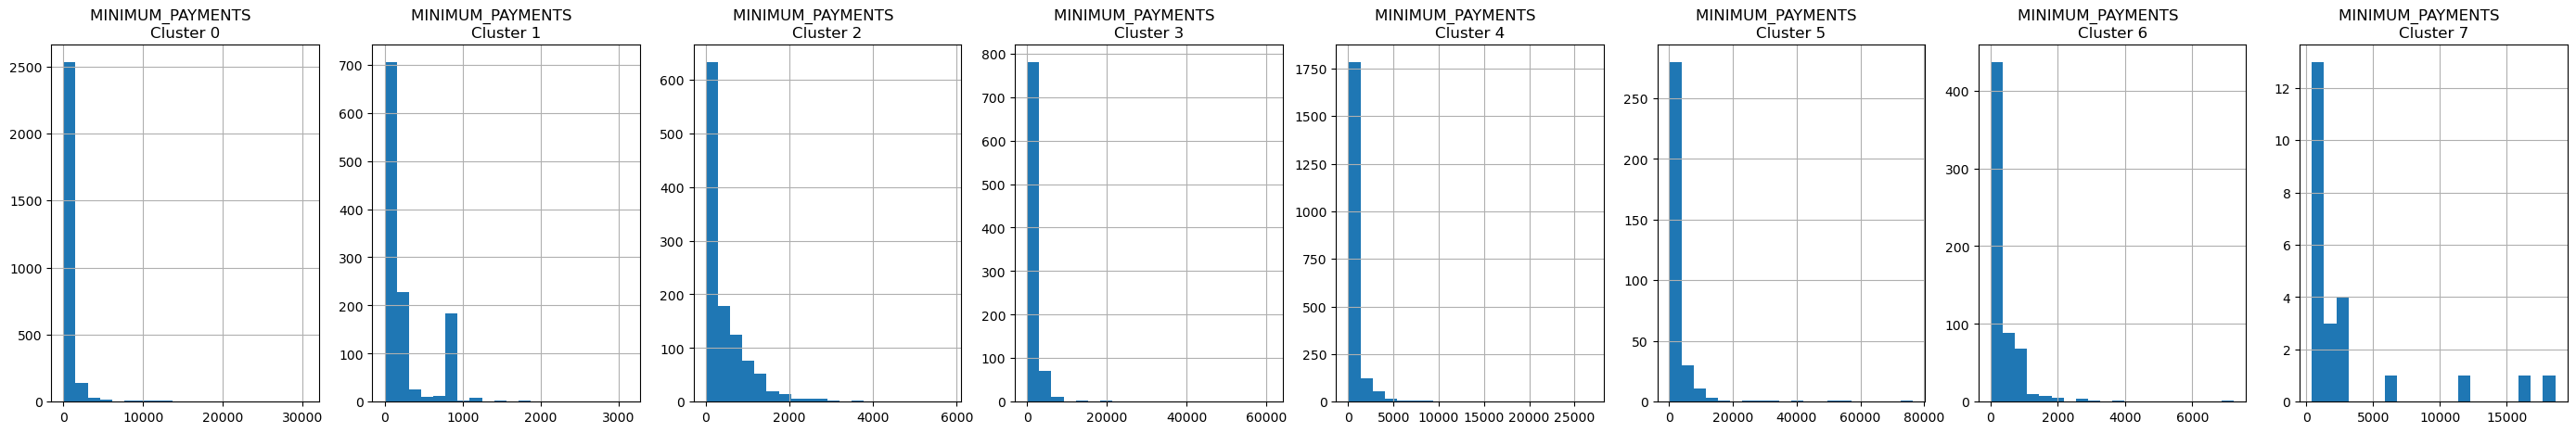

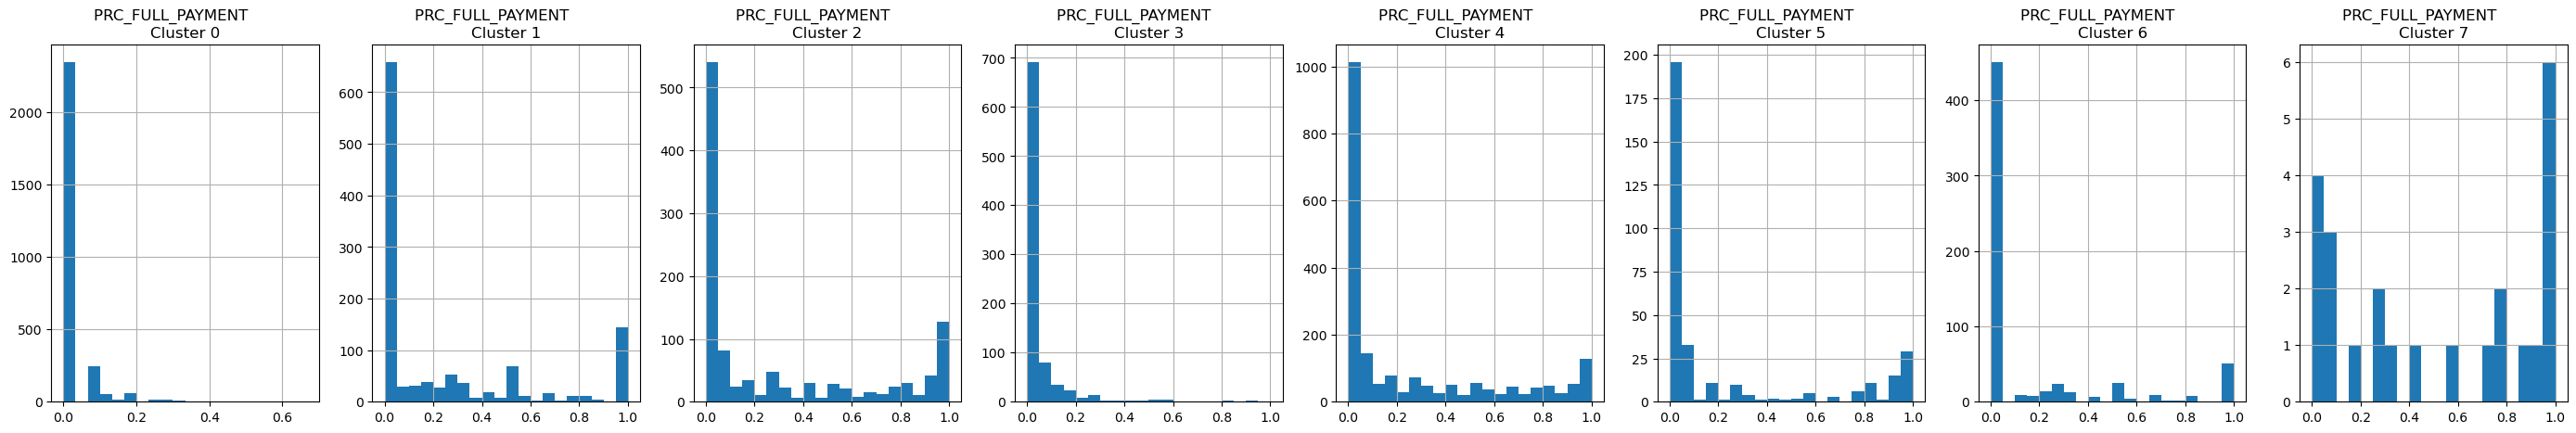

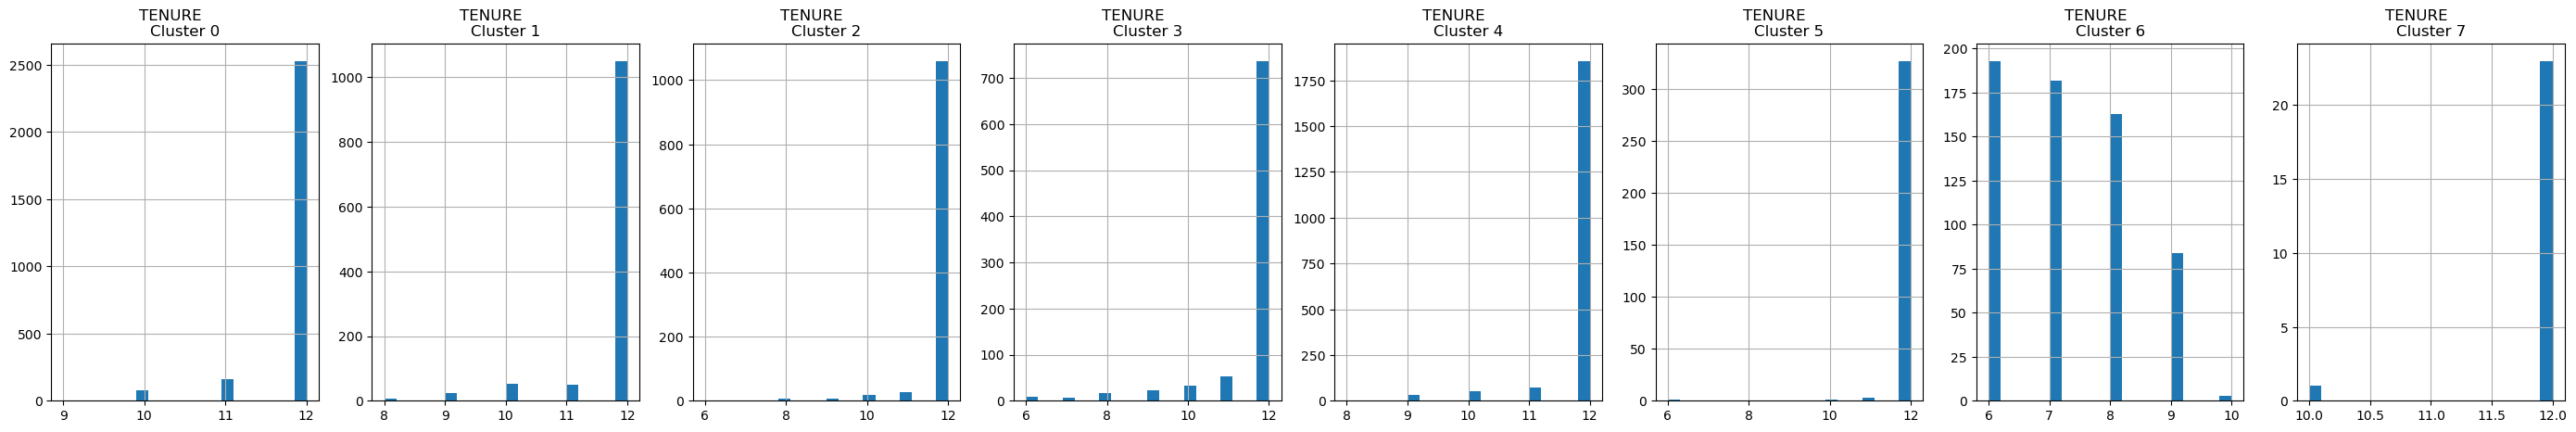

In [42]:
# 1.- Realizaremos un gráfico para cada cluster de cada variable, es decir, 8 gráficos para cada columna.
# 2.- 
for i in df.columns:
    plt.figure(figsize = (35,5)) # grafico
    for j in range(8): # 8 gráficos para cada una de las columnas del bucle anterior
        plt.subplot(1,8,j+1) # dibujar en 1 fila, 8 columnas, donde el actual sea j+1
        cluster = df_cluster[df_cluster['CLUSTER'] == j] # me quedo con los clientes marcados en el cluster j-ésimo
        cluster[i].hist(bins = 20) # dibujamos un histograma para la columna i-ésima, con el número total de divisiones sea de 20, para compararlos graficamente entre sí
        plt.title('{}      \nCluster {}'.format(i,j)) # título para cada gráfico
    plt.show()

# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

## 7.1 Obtener las componentes principales

In [43]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[-1.68221971, -1.07644932],
       [-1.13829519,  2.50647699],
       [ 0.96968428, -0.38352428],
       ...,
       [-0.9262025 , -1.81078623],
       [-2.33655131, -0.65796402],
       [-0.55642382, -0.40046839]])

## 7.2 Crear dataframe con las componentes principales

In [44]:
pca_df = pd.DataFrame(data = principal_components, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138295,2.506477
2,0.969684,-0.383524
3,-0.873628,0.043175
4,-1.599433,-0.688583


## 7.3 Concatenar las componentes principales con las etiquetas de los clusters

In [45]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER':labels})], axis = 1 )
pca_df.head()

,pca1,pca2,CLUSTER
0,-1.682220,-1.076449,0
1,-1.138295,2.506477,3
2,0.969684,-0.383524,2
3,-0.873628,0.043175,0
4,-1.599433,-0.688583,0


## 7.4 Visualización

### 7.4.1 Primer método

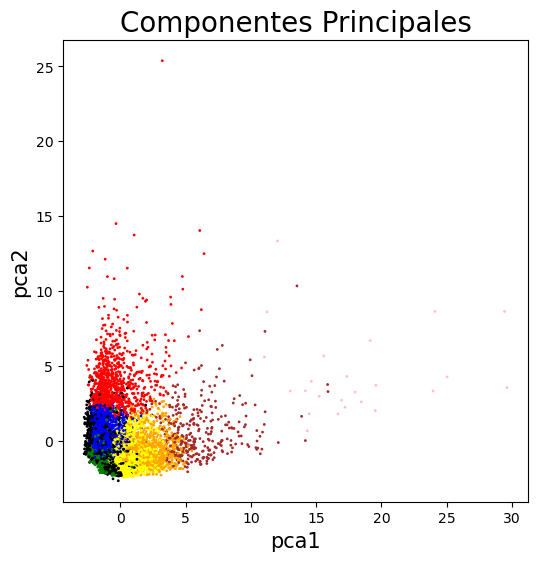

In [46]:
fig = plt.figure(figsize = (6,6)) #creamos una figura de 6x6

ax = fig.add_subplot(1,1,1) #indicamos que haremos solo un gráfico dentro de la figura
ax.set_xlabel('pca1', fontsize = 15) #nombres del eje x
ax.set_ylabel('pca2', fontsize = 15) #nombre del eje y
ax.set_title('Componentes Principales', fontsize = 20) #nombre del gráfico

color_theme = np.array(['blue', 'green', 'orange','red','yellow','brown','black','pink']) #creamos un array con ocho colores para cada cluster
ax.scatter(x = pca_df.pca1, y = pca_df.pca2,
          c = color_theme[pca_df.CLUSTER], s = 1)
#dibujar los puntos que representarán los vinos con scatter
#agregamos los valores de las columnas componentes
#usamos el parámetro c para indicarle los colores que deseamos para los puntos
# esta información se encuentra en KMeans_Clusters del objeto pca_nombres_vinos
# el tamaño de los puntos a graficar será de 50

plt.show()

## 7.4.2 Segundo método

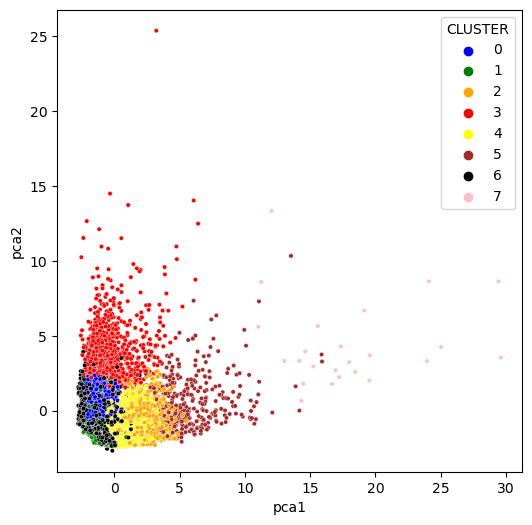

In [47]:
# Mucho más corto que el anterior
plt.figure(figsize = (6, 6))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER', data = pca_df, palette = ['blue', 'green', 'orange','red','yellow','brown','black','pink'], s = 10)
plt.show()

# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1kY4Ol3OvDd4IaFdrGXB8s-vAa1bhsT6V)

![alt text](https://drive.google.com/uc?id=1qtSiLgN_ZYWV_SPD79xpiapkbHxNmqvb)

![alt text](https://drive.google.com/uc?id=13sf_hXzpb2_bctB5EF7w-pXDV_72J95_)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

## 9.1 Importar librerías de Deep Learning

In [48]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
# tooodas las bibliotecas importadas en la linea de arriba, son para no crear la arquitectura desde cero
from tensorflow.keras.models import Model, load_model # estas librerías son para cargar y crear nuestro modelo
from tensorflow.keras.initializers import glorot_uniform # a la hora de inicializar nuestras capas, queremos que siga una distribución norma normal truncada
from keras.optimizers import SGD # stochastic gradient descent: algoritmo que permite que el entrenamiento sea estocástico par no estancarse en soluciones locales si no ir por la solución global

## 9.2 Crear la arquitectura de la red neuronal

### 9.2.1 Disminuir la información

In [52]:
# la idea es tener menos datos que al inicio para que al usar el algoritmo de Kmeans, obtengamos mejores resultados
encoding_dim = 7
input_df = Input(shape = (17, ))
# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada
x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [50]:
df_scaled.shape

(8950, 17)

In [53]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [54]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs=25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 23ms/step - loss: 0.5591
Epoch 2/25
70/70 [==============================] - 2s 25ms/step - loss: 0.2994
Epoch 3/25
70/70 [==============================] - 2s 24ms/step - loss: 0.2303
Epoch 4/25
70/70 [==============================] - 2s 33ms/step - loss: 0.2043
Epoch 5/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1748
Epoch 6/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1589
Epoch 7/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1449
Epoch 8/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1326
Epoch 9/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1371
Epoch 10/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1242
Epoch 11/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1117
Epoch 12/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1121
Epoch 13/25
70/70 [==================

In [55]:
autoencoder.save_weights('autoencoder.h5')

# ¡EXCELENTE TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS HABILIDADES RECIEN ADQUIRIDAS